# Introduction

I am newcomer to the Kaggle. Had chance to study kernels shared by @ManavSinghal, @Anisotropic & @pedroMarcelino. This notebook borrowed from above mentioned persons. 

In [124]:
# Load libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Exploratory Analysis

Explore the data on hand, identify possible feature engineering opportunities as well as numerically encode any categorical features.

In [125]:
#Load train and test datasets
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

# Store our passenger ID for easy access
PassengerId = test['PassengerId']

In [126]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [127]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 73.1+ KB


In [129]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [130]:
#Features with different data types
train.get_dtype_counts()

float64    2
int64      5
object     5
dtype: int64

### Missing values
Find the missing values in train & test datasets.

In [131]:
#Missing values in train dataset
total_nullvalues = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_nullvalues, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(10)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [132]:
#Missing values in test dataset
total_nullvalues = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_nullvalues, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(10)


,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [133]:
#Unique number of tickets in train 
unique = np.count_nonzero(train['Ticket'].unique())
#Total count of tickets
total_count = np.count_nonzero(train['Ticket'])
perc = (1 - (float(unique)/total_count)) * 100.0 
print ("Unique Ticket Count : %.2f, Total Ticket Count : %.2f, Unique Ticket Percentage : %.2f%%" %(unique, total_count, perc))


Unique Ticket Count : 681.00, Total Ticket Count : 891.00, Unique Ticket Percentage : 23.57%


In [134]:
pd.crosstab(train['Survived'], train['Sex'], margins=False)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [135]:
pd.crosstab(train['Survived'], train['Pclass'], margins=False)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [136]:
pd.crosstab(train['Survived'], train['Embarked'], margins=False)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


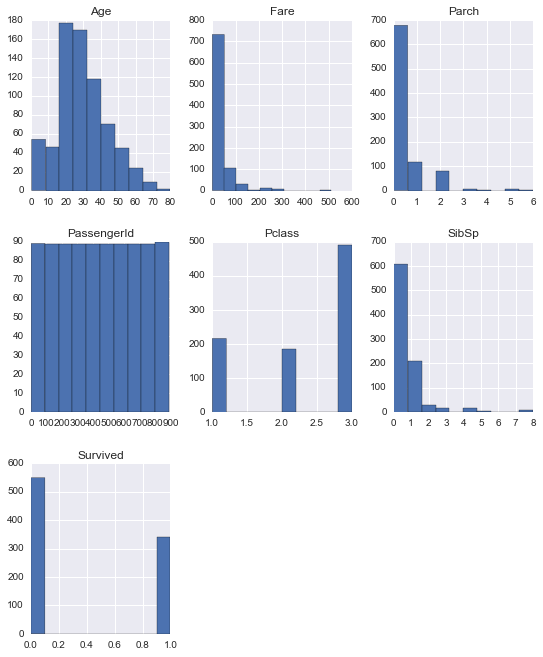

In [137]:
train.hist(bins=10,figsize=(9,11),grid=True);

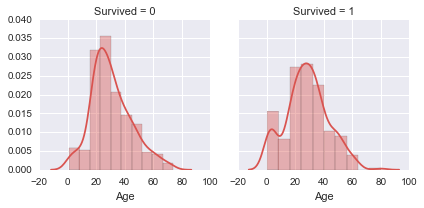

In [138]:
graph = sns.FacetGrid(train, col='Survived')
graph.map(sns.distplot, 'Age',  bins=10, color="#d9534f");

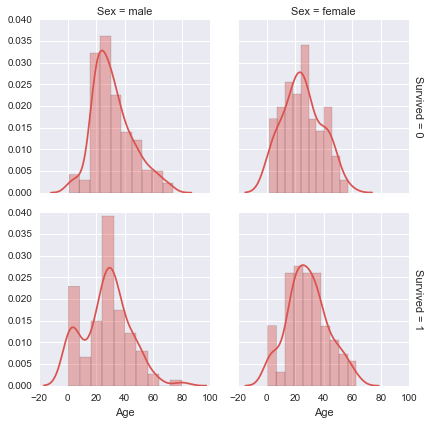

In [139]:
graph = sns.FacetGrid(train, row='Survived', col='Sex',margin_titles=True)
graph.map(sns.distplot, 'Age',bins=10, color="#d9534f");

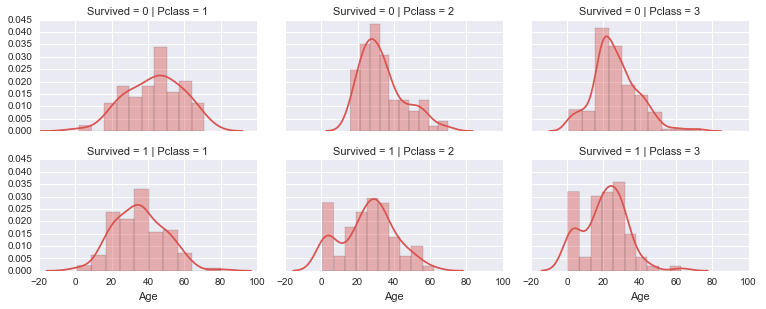

In [140]:
graph = sns.FacetGrid(train, col='Pclass', row='Survived', size=2.2, aspect=1.6)
graph.map(sns.distplot, 'Age', bins=10, color="#d9534f")
graph.add_legend()

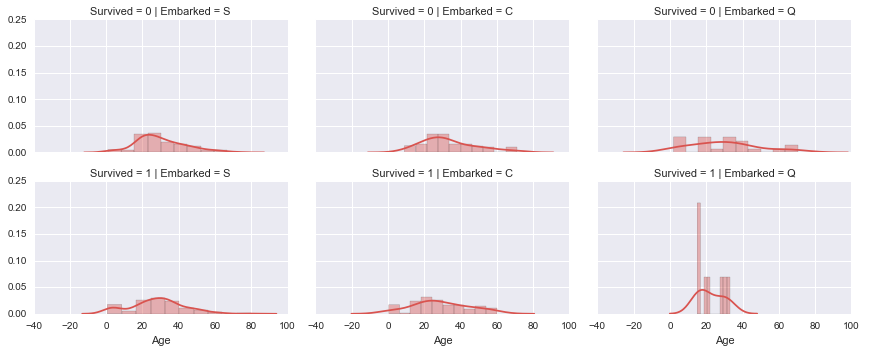

In [141]:
graph = sns.FacetGrid(train, col='Embarked', row='Survived', size=2.5, aspect=1.6)
graph.map(sns.distplot, 'Age', bins=10, color="#d9534f")
graph.add_legend()

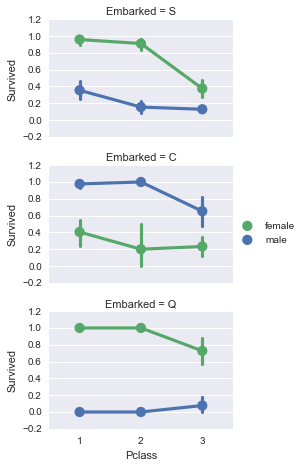

In [142]:
graph = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
graph.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
graph.add_legend()

In [143]:
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
train['CategoricalAge'] = pd.qcut(train['Age'], 5)


In [146]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalFare,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,"[0, 7.91]","(19, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,"(31, 512.329]","(31.8, 41]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.91, 14.454]","(25, 31.8]"


# Data Cleaning


In [147]:
# Extract titles from passenger names 
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

**Feature Engineering**

Here, credit must be extended to Sina's very comprehensive and well-thought out notebook for the feature engineering ideas so please check out his work 

In [148]:
full_data = [train, test]

# Cabin value is NAN then 0 else 1
# Cabin 	687 	77.10% missing values
for dataset in full_data:
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

    # Feature engineering steps taken from Sina
    # Create new feature FamilySize as a combination of SibSp and Parch
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

    # Create new feature IsAlone from FamilySize
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

    # Remove all NULLS in the Embarked column
    #Embarked 	2 	0.2245% missing values. 
    dataset['Embarked'] = dataset['Embarked'].fillna('S')


    # Remove all NULLS in the Fare column and create a new feature CategoricalFare 418 are null
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

    # Create a New feature CategoricalAge
    #Age 	177 	19.87% missing values. Fill with mean values
    dataset['Age'] = dataset['Age'].fillna(value=dataset['Age'].mean())
    dataset['Age'] = dataset['Age'].astype(int)

    # Create a new feature Title, containing the titles of passenger names
    dataset['Title'] = dataset['Name'].apply(get_title)

    # Group all non-common titles into one single grouping "Rare"
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Lady', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Countess', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Jonkheer', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Dona', 'Mrs')

    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 8.00, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 8.00) & (dataset['Fare'] <= 15.00), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 15.00) & (dataset['Fare'] <= 31.00), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31.00, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4;




In [150]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalFare,CategoricalAge,Has_Cabin,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,"[0, 7.91]","(19, 25]",0,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,"(31, 512.329]","(31.8, 41]",1,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,0,NaN,0,"(7.91, 14.454]","(25, 31.8]",0,1,1,2


In [151]:
# Feature selection
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp'], axis = 1)
test  = test.drop(['Name', 'Ticket', 'Cabin', 'SibSp'], axis = 1)

In [152]:
train.head(3)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,CategoricalFare,CategoricalAge,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,"[0, 7.91]","(19, 25]",0,2,0,1
1,1,1,0,2,0,3,1,"(31, 512.329]","(31.8, 41]",1,2,0,3
2,1,3,0,1,0,0,0,"(7.91, 14.454]","(25, 31.8]",0,1,1,2


In [153]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [154]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


In [155]:
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


### Visulalization
Analyze data post data wrangling prcoess

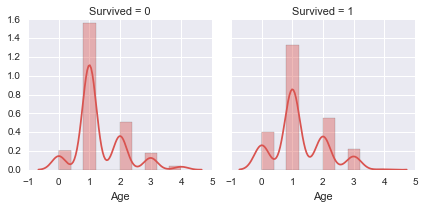

In [156]:
graph = sns.FacetGrid(train, col='Survived')
graph.map(sns.distplot, 'Age', bins=10, color="#d9534f")

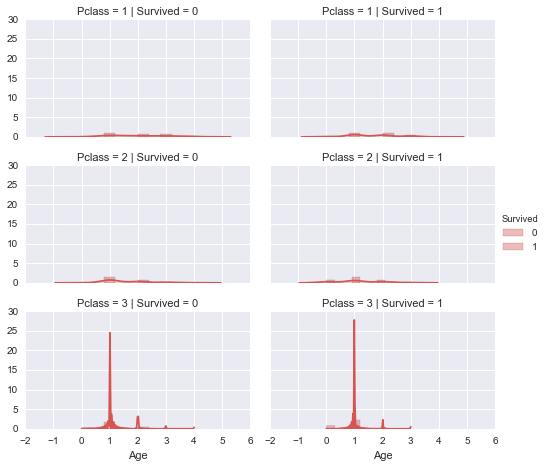

In [157]:
graph = sns.FacetGrid(train, col='Survived', hue='Survived', row='Pclass', size=2.2, aspect=1.6)
graph.map(sns.distplot, 'Age', bins=10, color="#d9534f")
graph.add_legend();

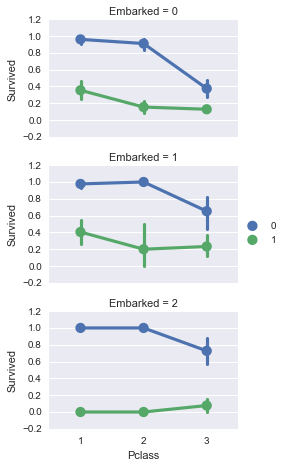

In [158]:
graph = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
graph.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
graph.add_legend()

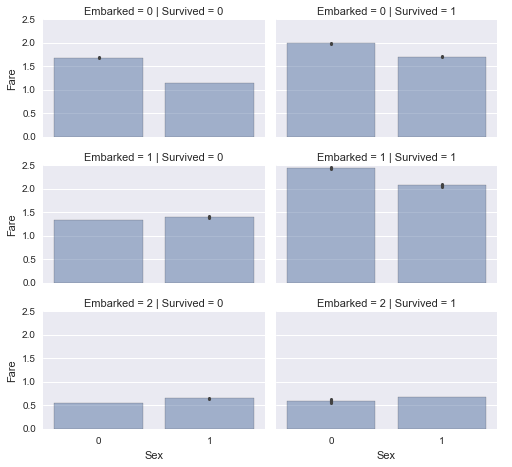

In [159]:
graph = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
graph.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=10)
graph.add_legend()

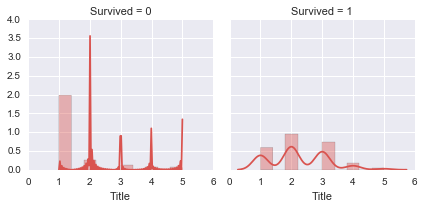

In [160]:
graph = sns.FacetGrid(train, col='Survived')
graph.map(sns.distplot, 'Title', bins=10, color="#d9534f")

In [161]:
train.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,CategoricalFare,CategoricalAge,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,"[0, 7.91]","(19, 25]",0,2,0,1
1,1,1,0,2,0,3,1,"(31, 512.329]","(31.8, 41]",1,2,0,3
2,1,3,0,1,0,0,0,"(7.91, 14.454]","(25, 31.8]",0,1,1,2
3,1,1,0,2,0,3,0,"(31, 512.329]","(31.8, 41]",1,2,0,3
4,0,3,1,2,0,1,0,"(7.91, 14.454]","(31.8, 41]",0,1,1,1


In [162]:
#Feature selection
train = train.drop(['CategoricalFare', 'CategoricalAge'], axis = 1)

In [163]:
corr=train.astype(float).corr()['Survived']
corr[np.argsort(corr, axis=0)[::-1]]

Survived      1.000000
Title         0.409918
Has_Cabin     0.316912
Fare          0.297071
Embarked      0.106811
Parch         0.081629
FamilySize    0.016639
Age          -0.044492
IsAlone      -0.203367
Pclass       -0.338481
Sex          -0.543351
Name: Survived, dtype: float64

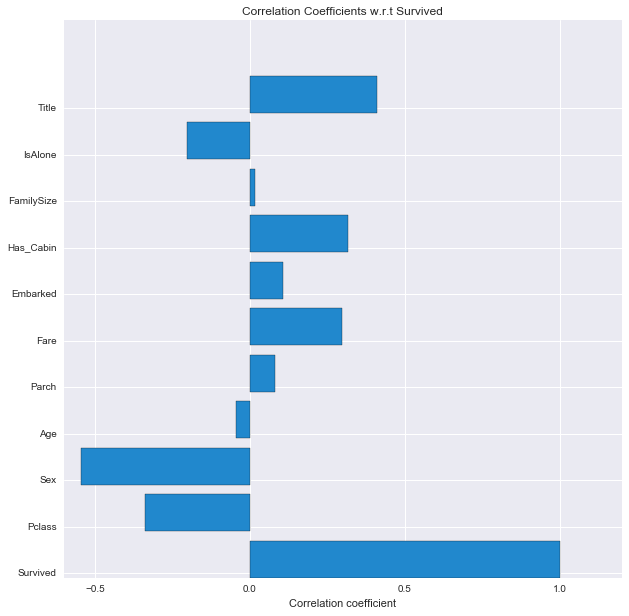

In [164]:
#plotting correlations
colNames=train.columns[train.dtypes!=object]
labels = []
values = []
for col in colNames:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train.Survived.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots(figsize=(10,10))
rects = ax.barh(ind, np.array(values), color='#2188cd')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Survived");

*** Correlation Heatmap ***

Correlation plots of the features to check how related to another feature.

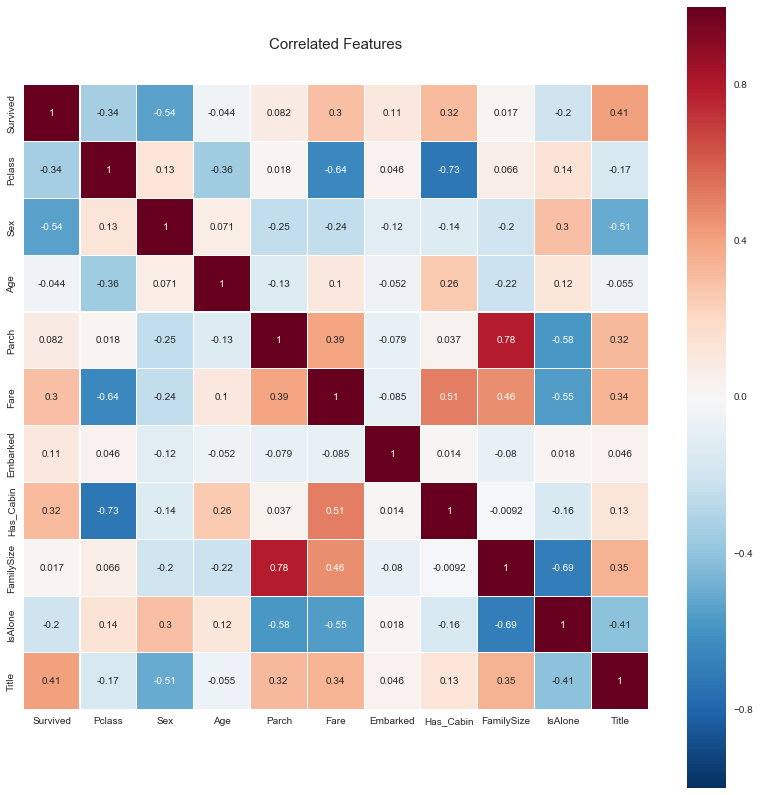

In [165]:
plt.figure(figsize=(14,14))
plt.title('Correlated Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, annot=True)

**Takeaway from the Plots**

There are not too many features strongly correlated with one another. This means that there are not much redundant data in train dataset. Each feature carries some unique information. The two most correlated features are Family size and Parch (Parents and Children).

**Pairplots**

To observe the distribution of data from one feature to other.

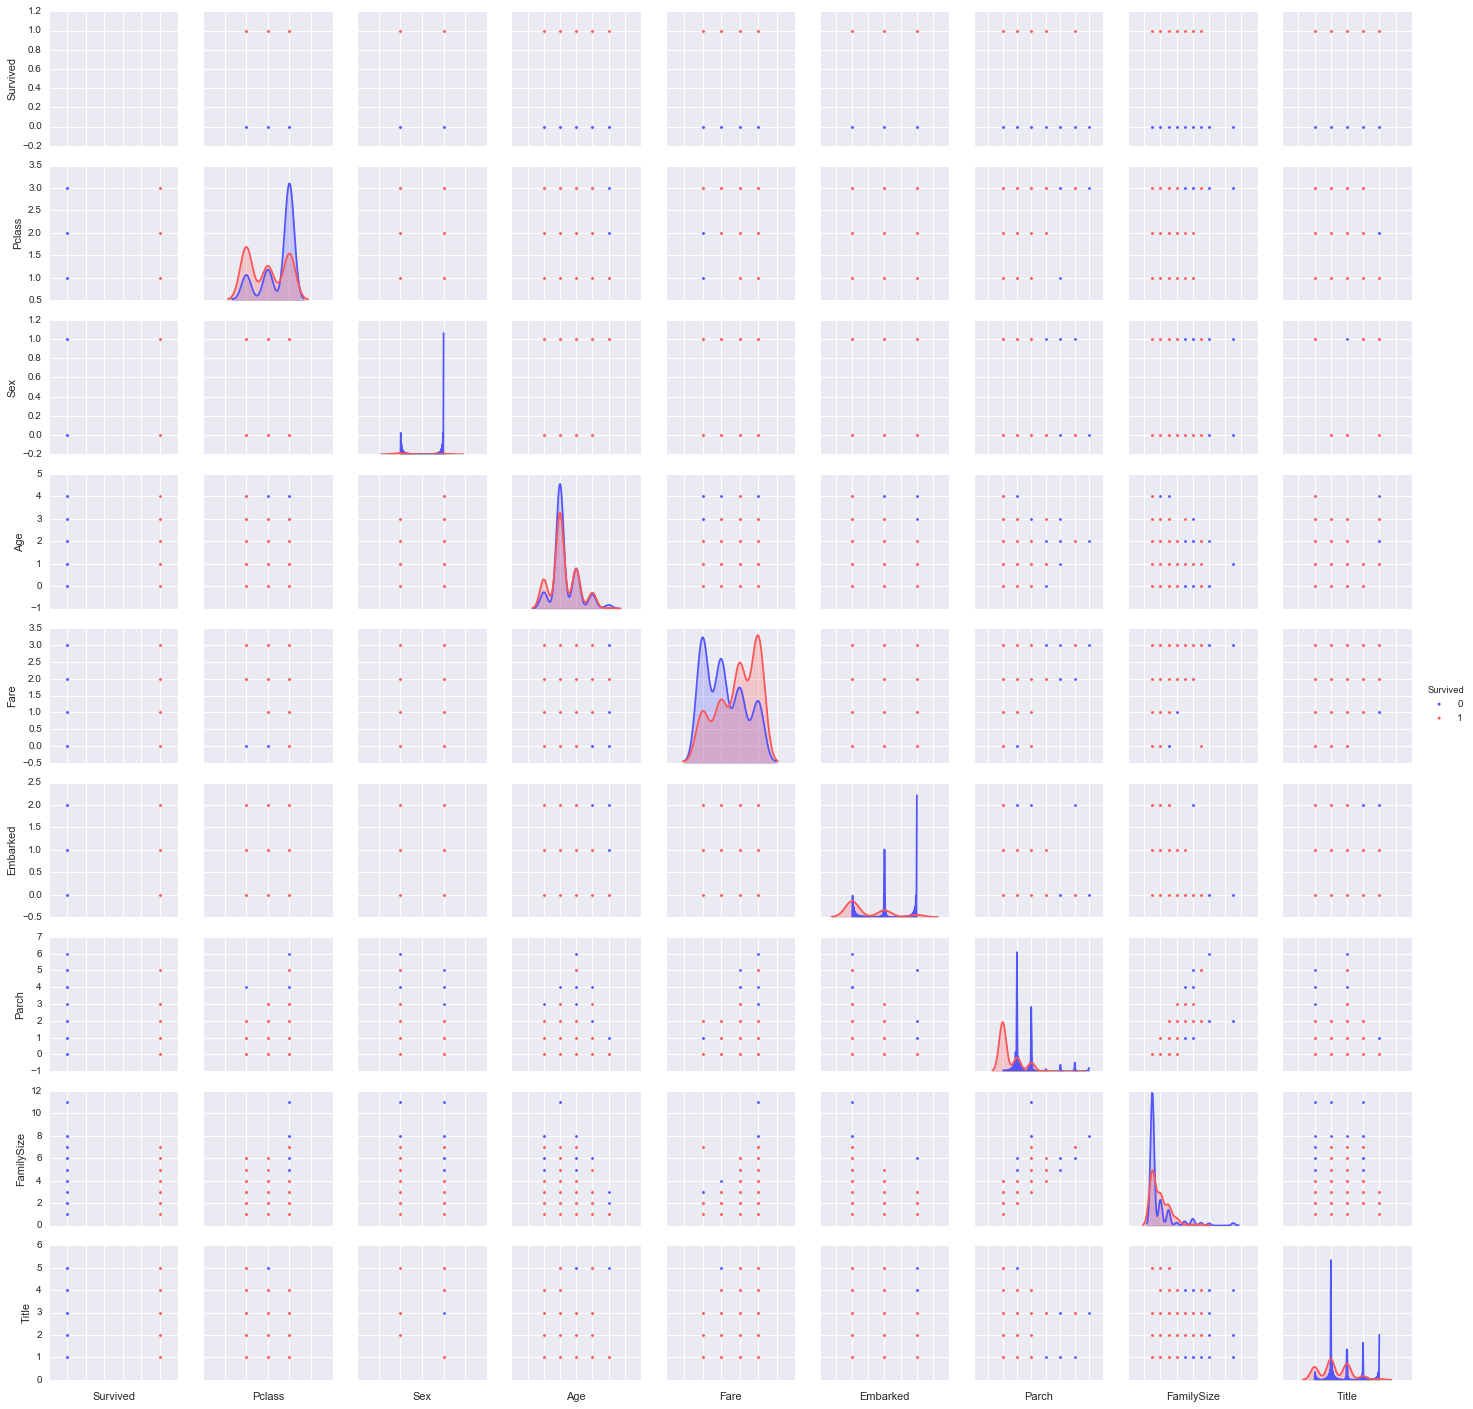

In [166]:
g = sns.pairplot(train[[u'Survived', u'Pclass', u'Sex', u'Age', u'Fare', u'Embarked', u'Parch', u'FamilySize', u'Title']], 
                 hue='Survived', palette='seismic',size=2.2, diag_kind='kde', diag_kws=dict(shade=True),
                 plot_kws=dict(s=10) ) 
g.set(xticklabels=[])

## Model & Predict

The problem is a classification and regression type. We have to identify relationship between Survived or not with other features. We are also perfoming a supervised learning (machine learning) as we are training the model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression. 

- Support Vector Machines
- KNN
- Logistic Regression
- Random Forest
- Naive Bayes
- Perceptron
- Stochastic Gradient Decent
- Linear SVC
- Decision Tree

In [167]:
test['PassengerId'] = PassengerId
test.head()

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,892,3,1,2,0,0,2,0,1,1,1
1,893,3,0,2,0,0,0,0,2,0,3
2,894,2,1,3,0,1,2,0,1,1,1
3,895,3,1,1,0,1,0,0,1,1,1
4,896,3,0,1,1,1,0,0,3,0,3


In [168]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1)
X_train.shape, Y_train.shape, X_test.shape
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null int32
Parch          418 non-null int64
Fare           418 non-null int32
Embarked       418 non-null int32
Has_Cabin      418 non-null int64
FamilySize     418 non-null int64
IsAlone        418 non-null int64
Title          418 non-null int64
dtypes: int32(4), int64(7)
memory usage: 32.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int32
Age           891 non-null int32
Parch         891 non-null int64
Fare          891 non-null int32
Embarked      891 non-null int32
Has_Cabin     891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null int64
dtyp

In [169]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.26

In [170]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
6,Has_Cabin,0.876943
9,Title,0.549249
4,Fare,0.297931
5,Embarked,0.215634
3,Parch,0.192660
8,IsAlone,-0.259728
0,Pclass,-0.438880
2,Age,-0.529689
7,FamilySize,-0.530549
1,Sex,-2.083254


In [172]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_pred})
#submission.to_csv('SVM_Titanic_submission.csv', index=False)

In [174]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_pred})
#submission.to_csv('KNN_Titanic_submission.csv', index=False)

In [175]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.24

In [176]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_pred})
#submission.to_csv('Gaus_Titanic_submission.csv', index=False)

In [177]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.56

In [178]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_pred})
#submission.to_csv('Perceptron_Titanic_submission.csv', index=False)

In [179]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

81.93

In [180]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_pred})
#submission.to_csv('LinearSVC_Titanic_submission.csv', index=False)

In [181]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.67

In [182]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_pred})
#submission.to_csv('SGDClass_Titanic_submission.csv', index=False)

In [183]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.9

In [184]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_pred})
#submission.to_csv('Decision_Titanic_submission.csv', index=False)

In [185]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.9

In [186]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.90
8,Decision Tree,89.90
1,KNN,85.86
0,Support Vector Machines,83.50
7,Linear SVC,81.93
2,Logistic Regression,81.26
4,Naive Bayes,79.24
5,Perceptron,78.56
6,Stochastic Gradient Decent,77.67


In [187]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_pred})
submission.to_csv('Titanic_submission.csv', index=False)